In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline


boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF["PRICE"] = boston.target

print(bostonDF.shape)
bostonDF

(506, 14)


c:\Users\OPERATOR-70\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets includ

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(["PRICE"], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size= 0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))

print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_,4))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757
절편 값: 40.995595172164435
회귀 계수값: [-1.13000e-01  6.55000e-02  3.44000e-02  3.04590e+00 -1.97958e+01
  3.35500e+00  5.90000e-03 -1.74190e+00  3.55900e-01 -1.43000e-02
 -9.20200e-01  1.04000e-02 -5.66200e-01]


In [39]:
from sklearn.preprocessing import StandardScaler

# 변형 객체 생성
std_scaler = StandardScaler()

# 훈련데이터의 모수 분포 저장
std_scaler.fit(X_train)

# 훈련 데이터 스케일링
X_train_scaled = std_scaler.transform(X_train)

# 테스트 데이터의 스케일링
X_test_scaled = std_scaler.transform(X_test)

# 스케일링 된 결과 값으로 본래 값을 구할 수도 있다.
# X_origin = std_scaler.inverse_transform(X_train_scaled)

X_train_scaled = pd.DataFrame(data = X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(data = X_test_scaled, columns=X_test.columns)
y_train = pd.DataFrame(y_train)
y_train.reset_index(drop='index', inplace=True)
y_test = pd.DataFrame(y_test)
y_test.reset_index(drop='index', inplace=True)

C:\Users\OPERATOR-70\AppData\Local\Temp\ipykernel_12404\3722451924.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])
C:\Users\OPERATOR-70\AppData\Local\Temp\ipykernel_12404\3722451924.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

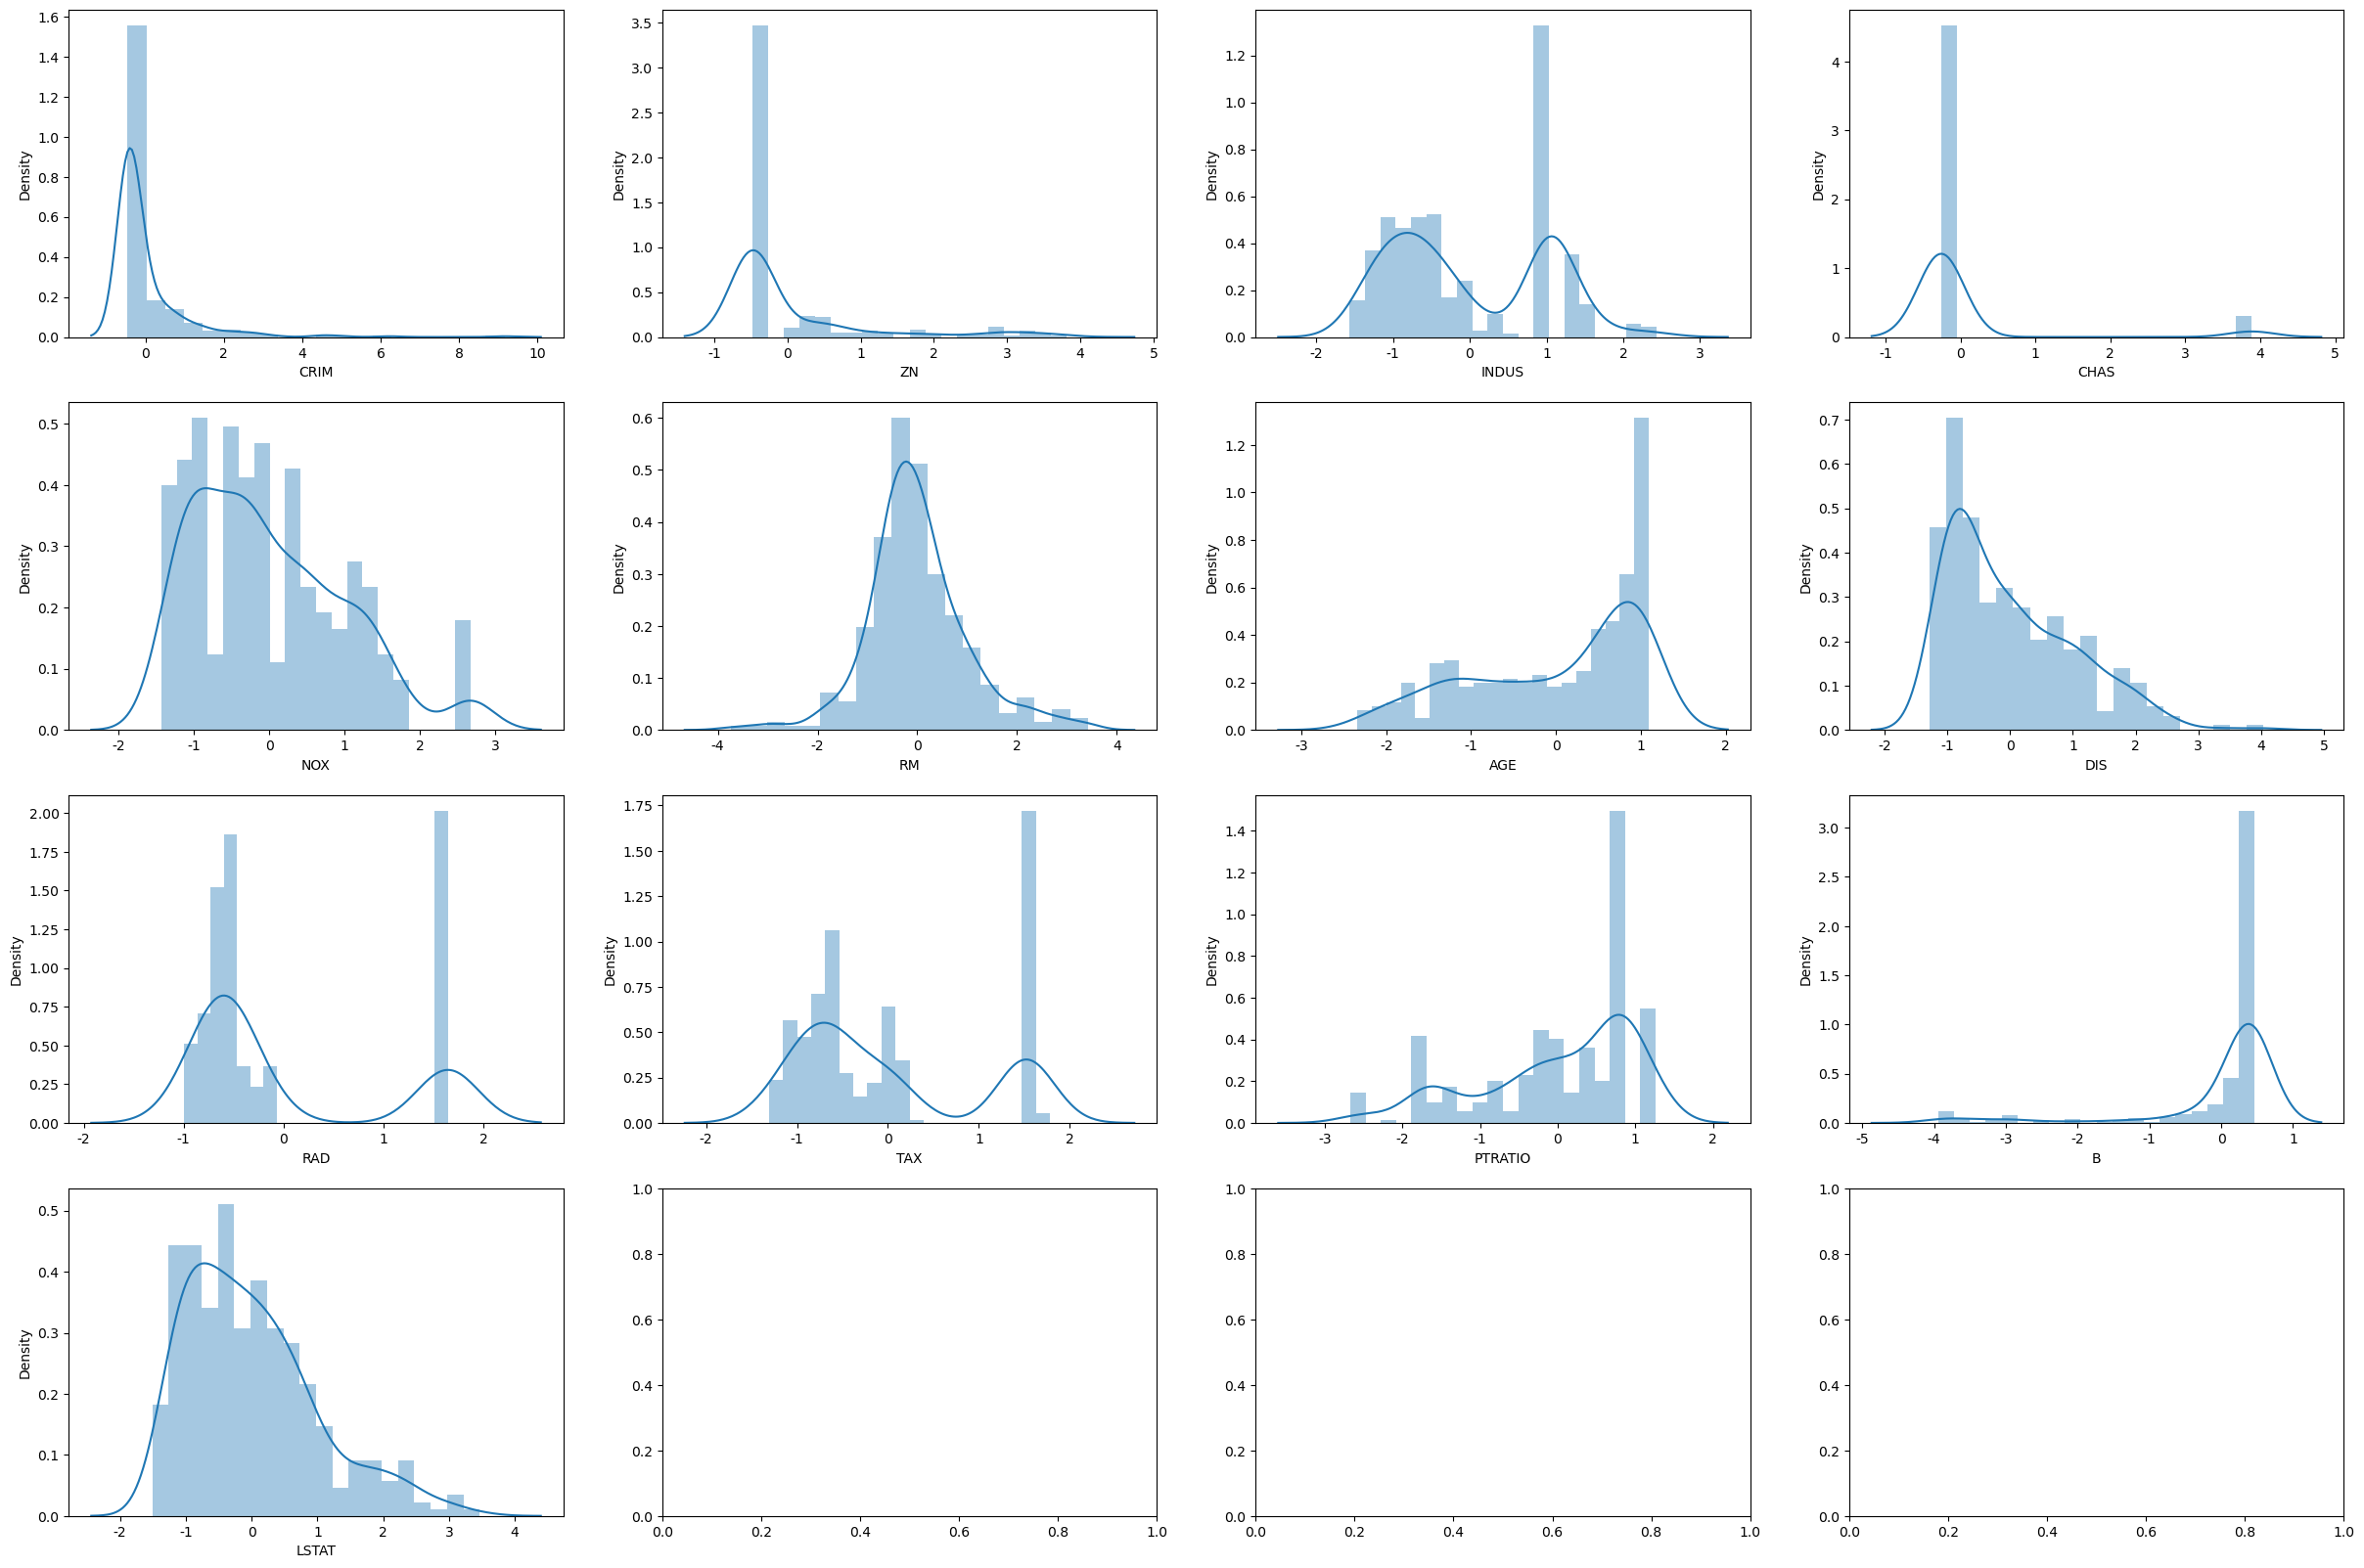

In [40]:
# histogram
col_n = 4
row_n = 4

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(X_train_scaled.columns):
    sns.distplot(X_train_scaled[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])

CRIM
ZN
INDUS
CHAS
NOX
RM
AGE
DIS
RAD
TAX
PTRATIO
B
LSTAT


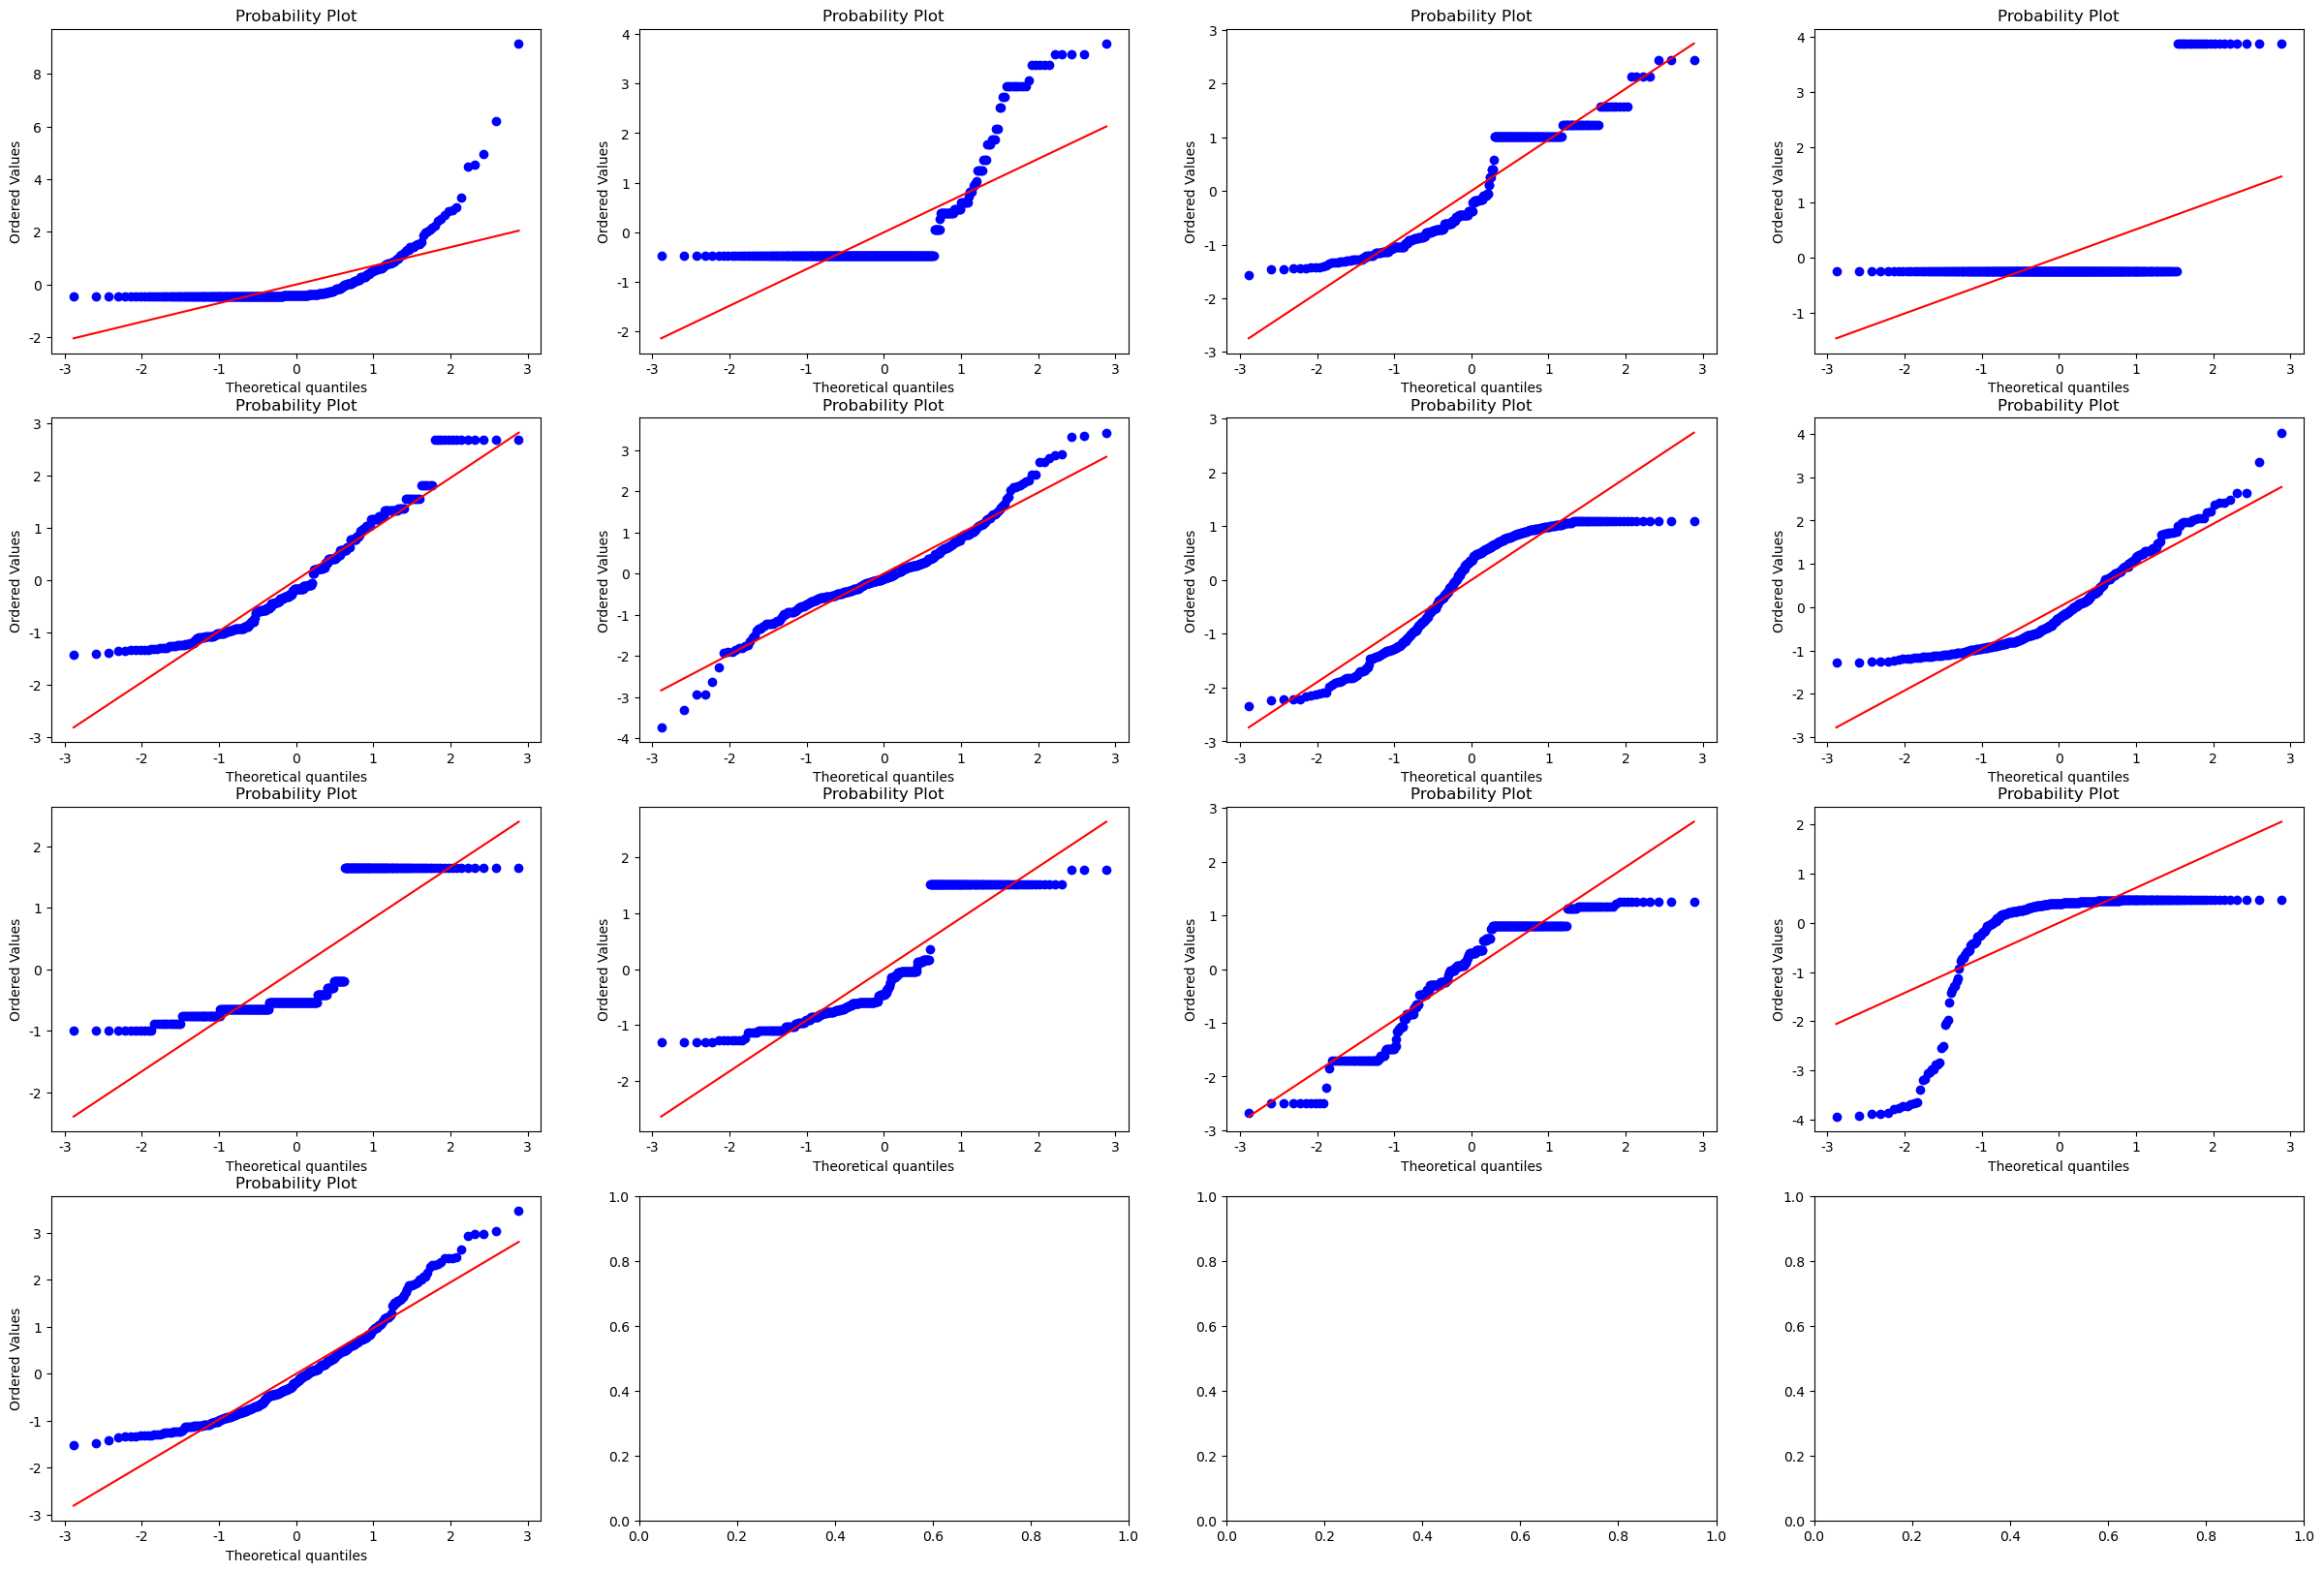

In [41]:
# histogram
col_n = 4
row_n = 4

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(X_train_scaled.columns):
    stats.probplot(X_train_scaled[col],dist=stats.norm, plot=ax[int(i/col_n),int(i%col_n)])
    print(col)

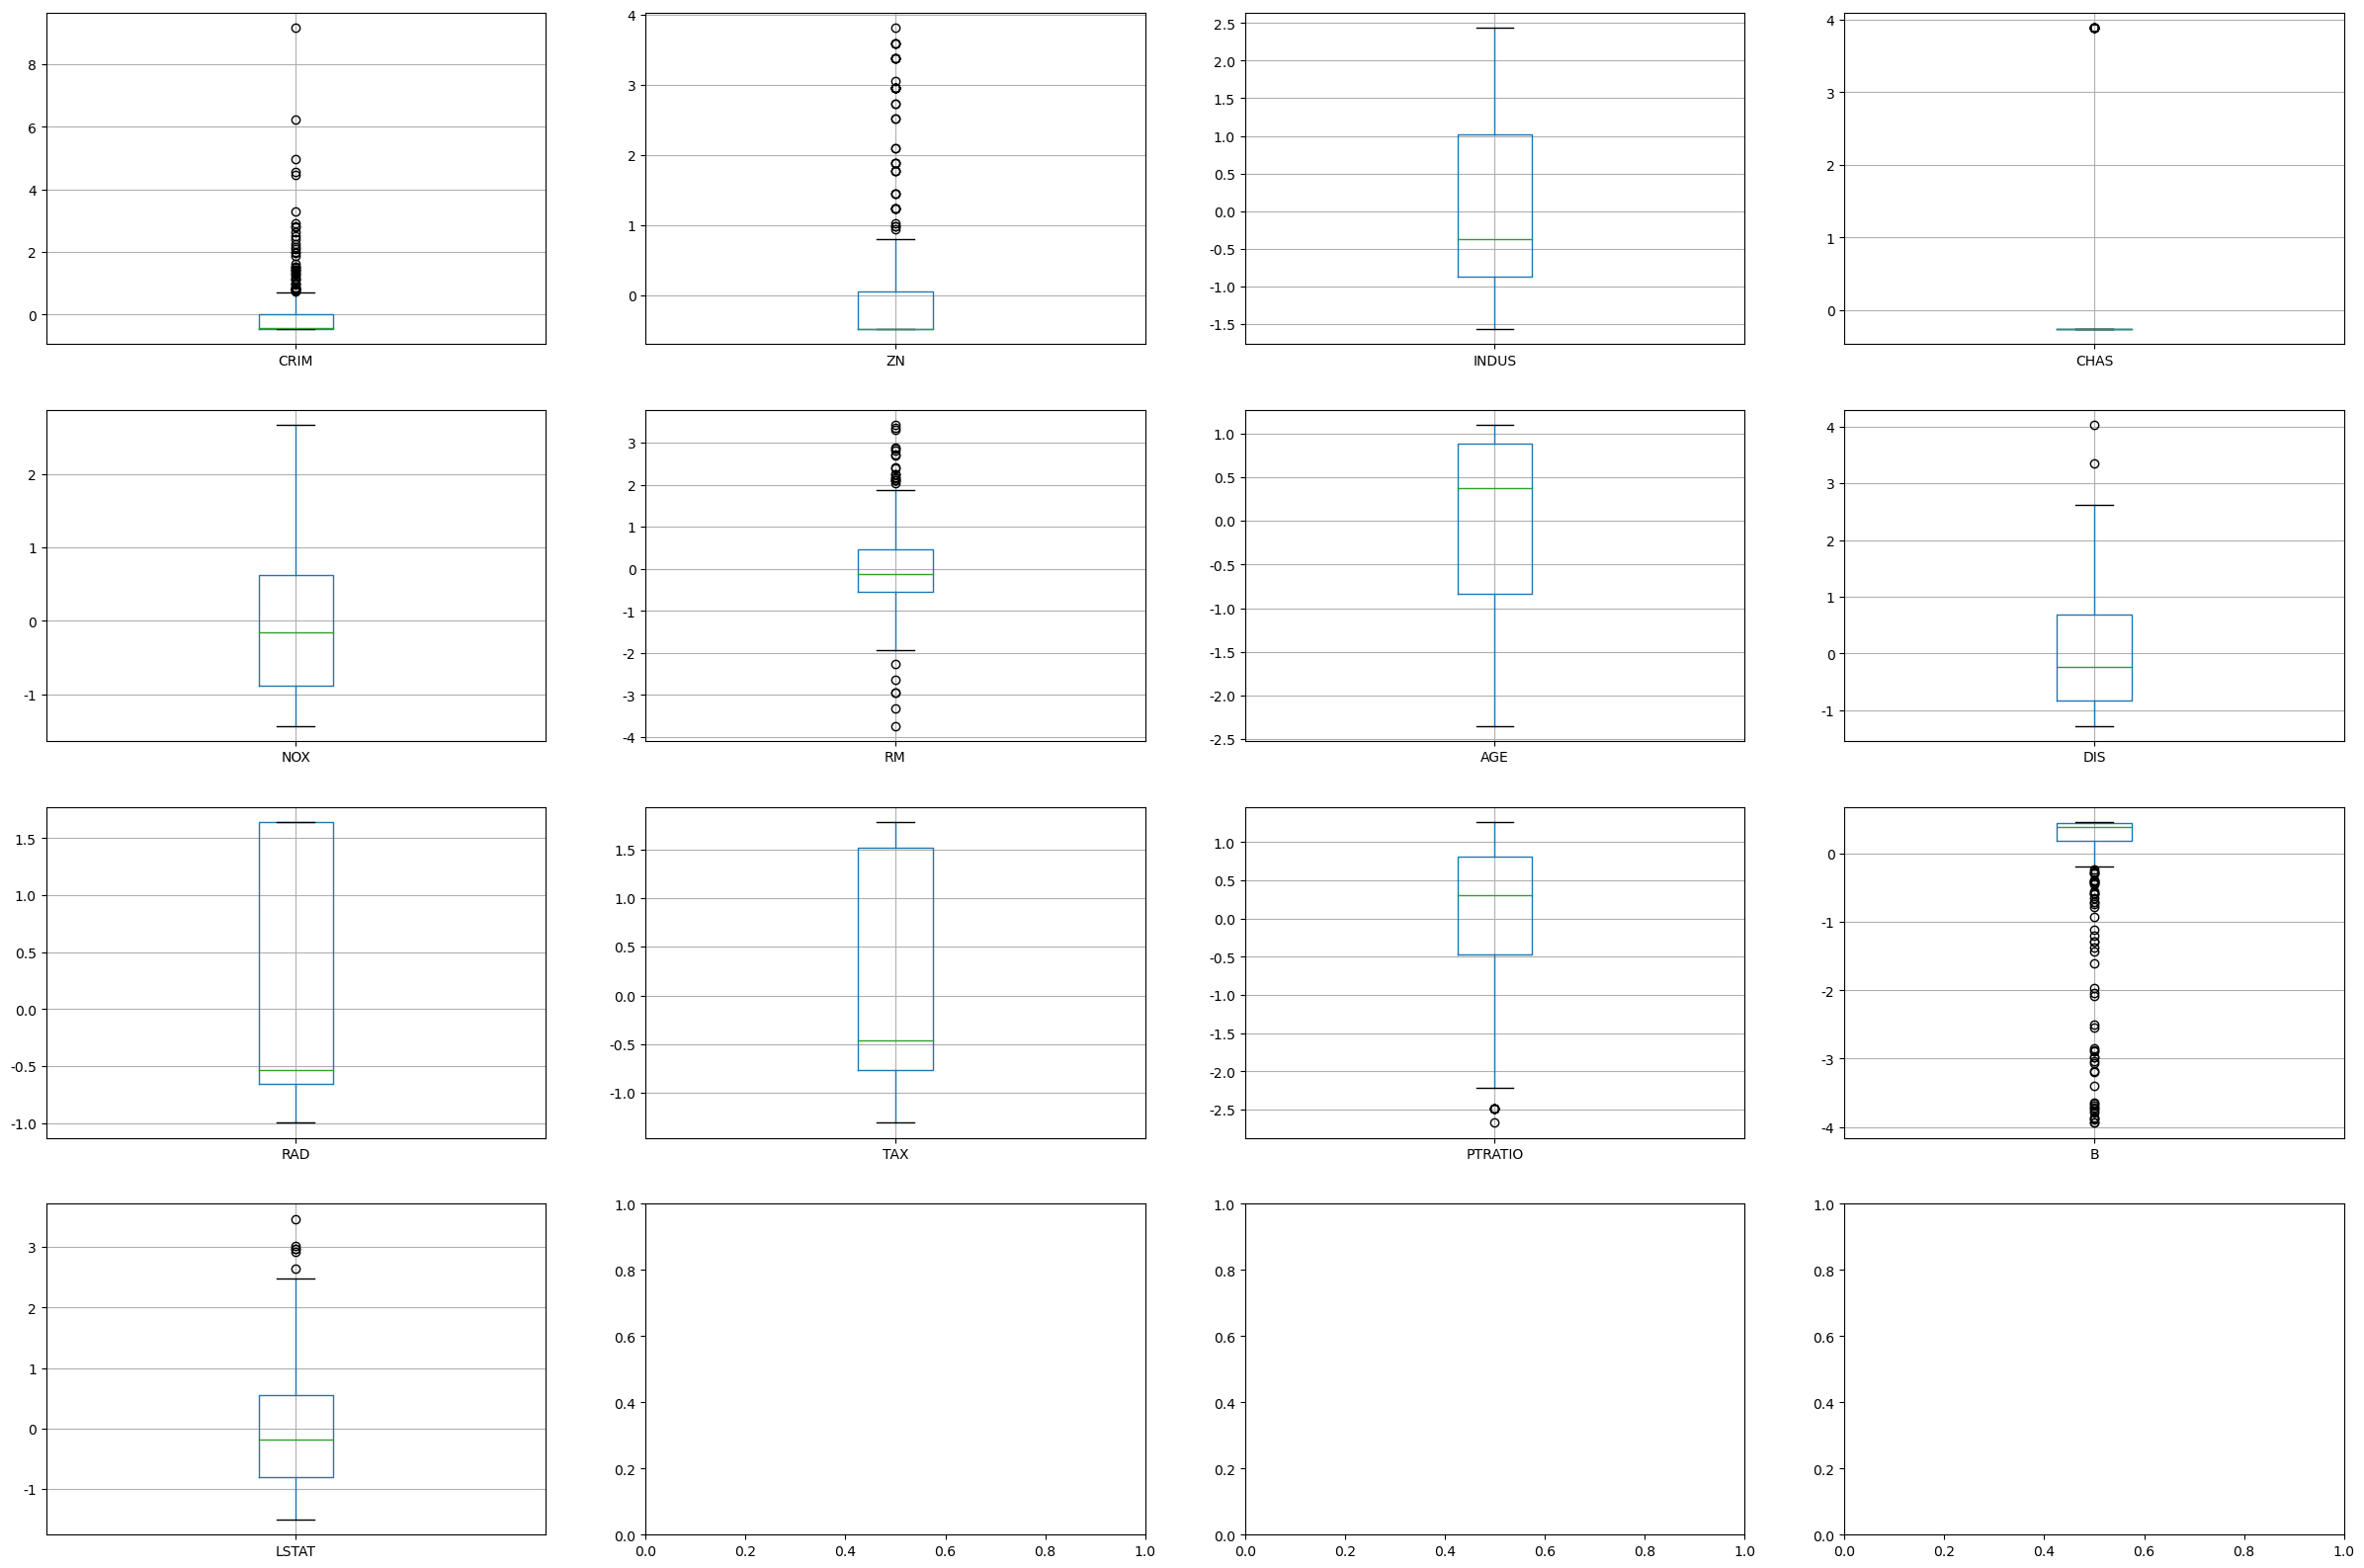

In [42]:
from matplotlib import rc 
col_n = 4
row_n = 4

# stats.probplot(df["대비_국고1년"], dist=stats.norm, plot=plt)
# plt.show()
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(X_train_scaled.columns):
    X_train_scaled.boxplot(column=col,ax=ax[int(i/col_n),int(i%col_n)])

In [43]:
import statsmodels.api as sm

feature_add = sm.add_constant(X_train_scaled,  has_constant='add')

# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     69.77
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           1.42e-87
Time:                        16:48:55   Log-Likelihood:                -1068.0
No. Observations:                 354   AIC:                             2164.
Df Residuals:                     340   BIC:                             2218.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.9099      0.268     85.467      0.000      22.383      23.437
CRIM          -0.8641      0.391     -2.210      0.028      -1.633      -0.095
ZN             1.5309      0.402      3.804      0.000       0.739       2.322
INDUS          0.2350      0.558      0.421      0.674      -0.863       1.333
CHAS           0.7353      0.277      2.651      0.008       0.190       1.281
NOX           -2.3246      0.560     -4.153      0.000      -3.426      -1.224
RM             2.4463      0.370      6.618      0.000       1.719       3.173
AGE            0.1674      0.456      0.367      0.714      -0.730       1.065
DIS           -3.6121      0.520     -6.941      0.000      -4.636      -2.588
RAD            3.1021      0.747      4.151      0.000       1.632       4.572
TAX           -2.4250      0.835     -2.904      0.004      -4.067      -0.783
PTRATIO       -2.0117      0.369     -5.456      0.000      -2.737      -1.286
B              0.9311      0.317      2.937      0.004       0.308       1.555
LSTAT         -4.1236      0.438     -9.421      0.000      -4.985      -3.263
==============================================================================
Omnibus:                      110.816   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              364.560
Skew:                           1.390   Prob(JB):                     6.87e-80
Kurtosis:                       7.122   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# X_train_scaled = X_data

def feature_engineering_XbyVIF(X_train_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train_scaled.values,i)
                            for i in range(X_train_scaled.shape[1])]
    vif["Feature"] = X_train_scaled.columns
    return vif
vif = feature_engineering_XbyVIF(X_train_scaled)
print(vif)

    VIF_Factor  Feature
0     2.127398     CRIM
1     2.253769       ZN
2     4.336859    INDUS
3     1.070585     CHAS
4     4.360357      NOX
5     1.901411       RM
6     2.898956      AGE
7     3.769443      DIS
8     7.772776      RAD
9     9.701960      TAX
10    1.891709  PTRATIO
11    1.398445        B
12    2.666125    LSTAT


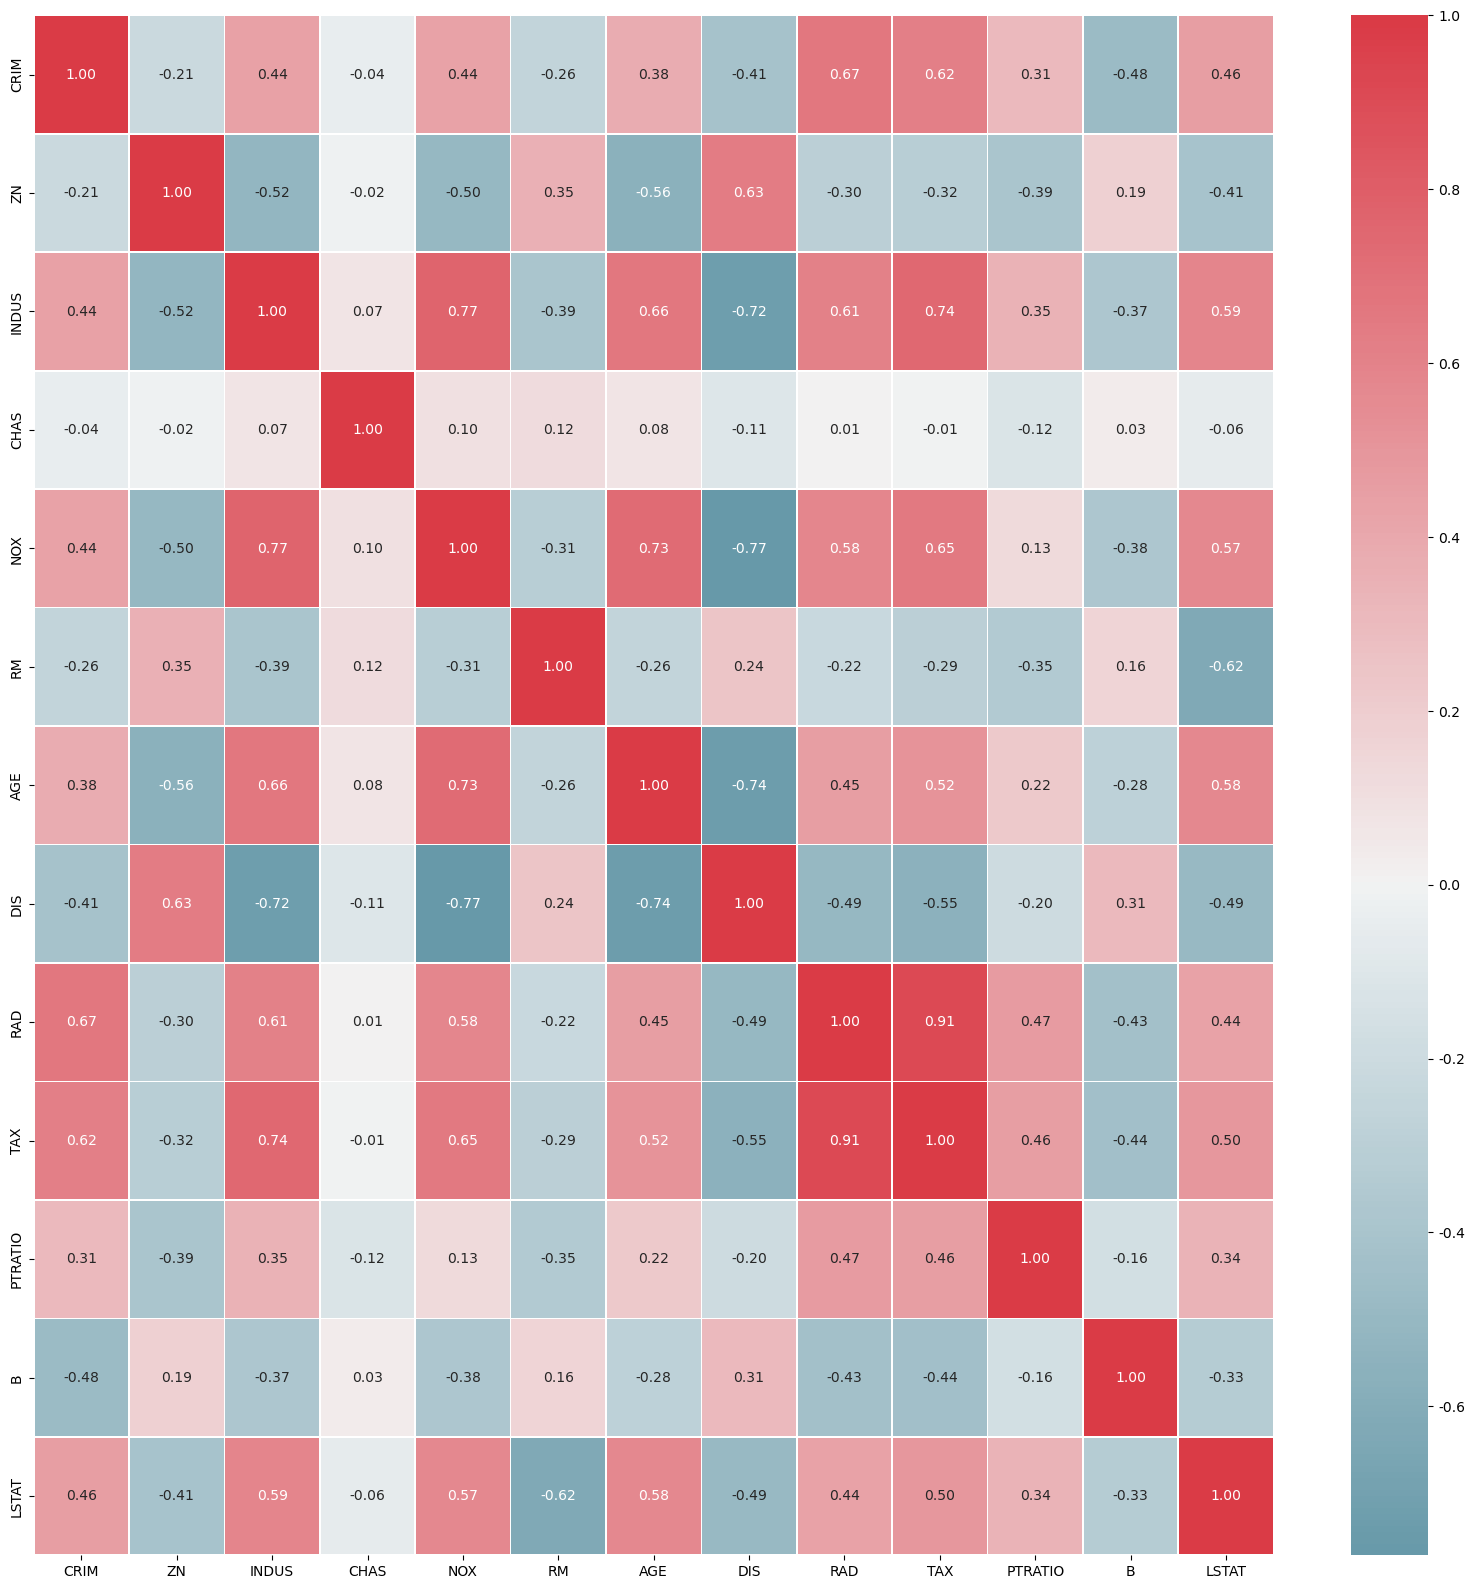

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy as sp  
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data = X_train_scaled.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0)

In [46]:
X_train_scaled.drop(['INDUS','AGE'], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(X_train_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     82.83
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           2.01e-89
Time:                        16:48:55   Log-Likelihood:                -1068.1
No. Observations:                 354   AIC:                             2160.
Df Residuals:                     342   BIC:                             2207.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.9099      0.267     85.677      0.000      22.384      23.436
CRIM          -0.8705      0.389     -2.236      0.026      -1.636      -0.105
ZN             1.4900      0.394      3.778      0.000       0.714       2.266
CHAS           0.7498      0.275      2.725      0.007       0.209       1.291
NOX           -2.2106      0.522     -4.233      0.000      -3.238      -1.184
RM             2.4582      0.361      6.801      0.000       1.747       3.169
DIS           -3.7121      0.489     -7.596      0.000      -4.673      -2.751
RAD            3.0019      0.716      4.191      0.000       1.593       4.411
TAX           -2.2497      0.737     -3.052      0.002      -3.700      -0.800
PTRATIO       -1.9912      0.366     -5.445      0.000      -2.711      -1.272
B              0.9314      0.315      2.952      0.003       0.311       1.552
LSTAT         -4.0589      0.417     -9.741      0.000      -4.879      -3.239
==============================================================================
Omnibus:                      112.572   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.664
Skew:                           1.405   Prob(JB):                     9.80e-83
Kurtosis:                       7.208   Cond. No.                         8.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# X_train_scaled = X_data

def feature_engineering_XbyVIF(X_train_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train_scaled.values,i)
                            for i in range(X_train_scaled.shape[1])]
    vif["Feature"] = X_train_scaled.columns
    return vif
vif = feature_engineering_XbyVIF(X_train_scaled)
print(vif)

    VIF_Factor  Feature
0     2.118974     CRIM
1     2.175144       ZN
2     1.058763     CHAS
3     3.813469      NOX
4     1.827100       RM
5     3.340238      DIS
6     7.174528      RAD
7     7.600443      TAX
8     1.870559  PTRATIO
9     1.391946        B
10    2.428474    LSTAT


In [48]:
X_train_scaled.columns
X_test_scaled=X_test_scaled[['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT']]

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_preds = lr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))

print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_,4))

MSE : 17.227, RMSE : 4.151
Variance score : 0.758
절편 값: [22.90988701]
회귀 계수값: [[-0.8705  1.49    0.7498 -2.2106  2.4582 -3.7121  3.0019 -2.2497 -1.9912
   0.9314 -4.0589]]


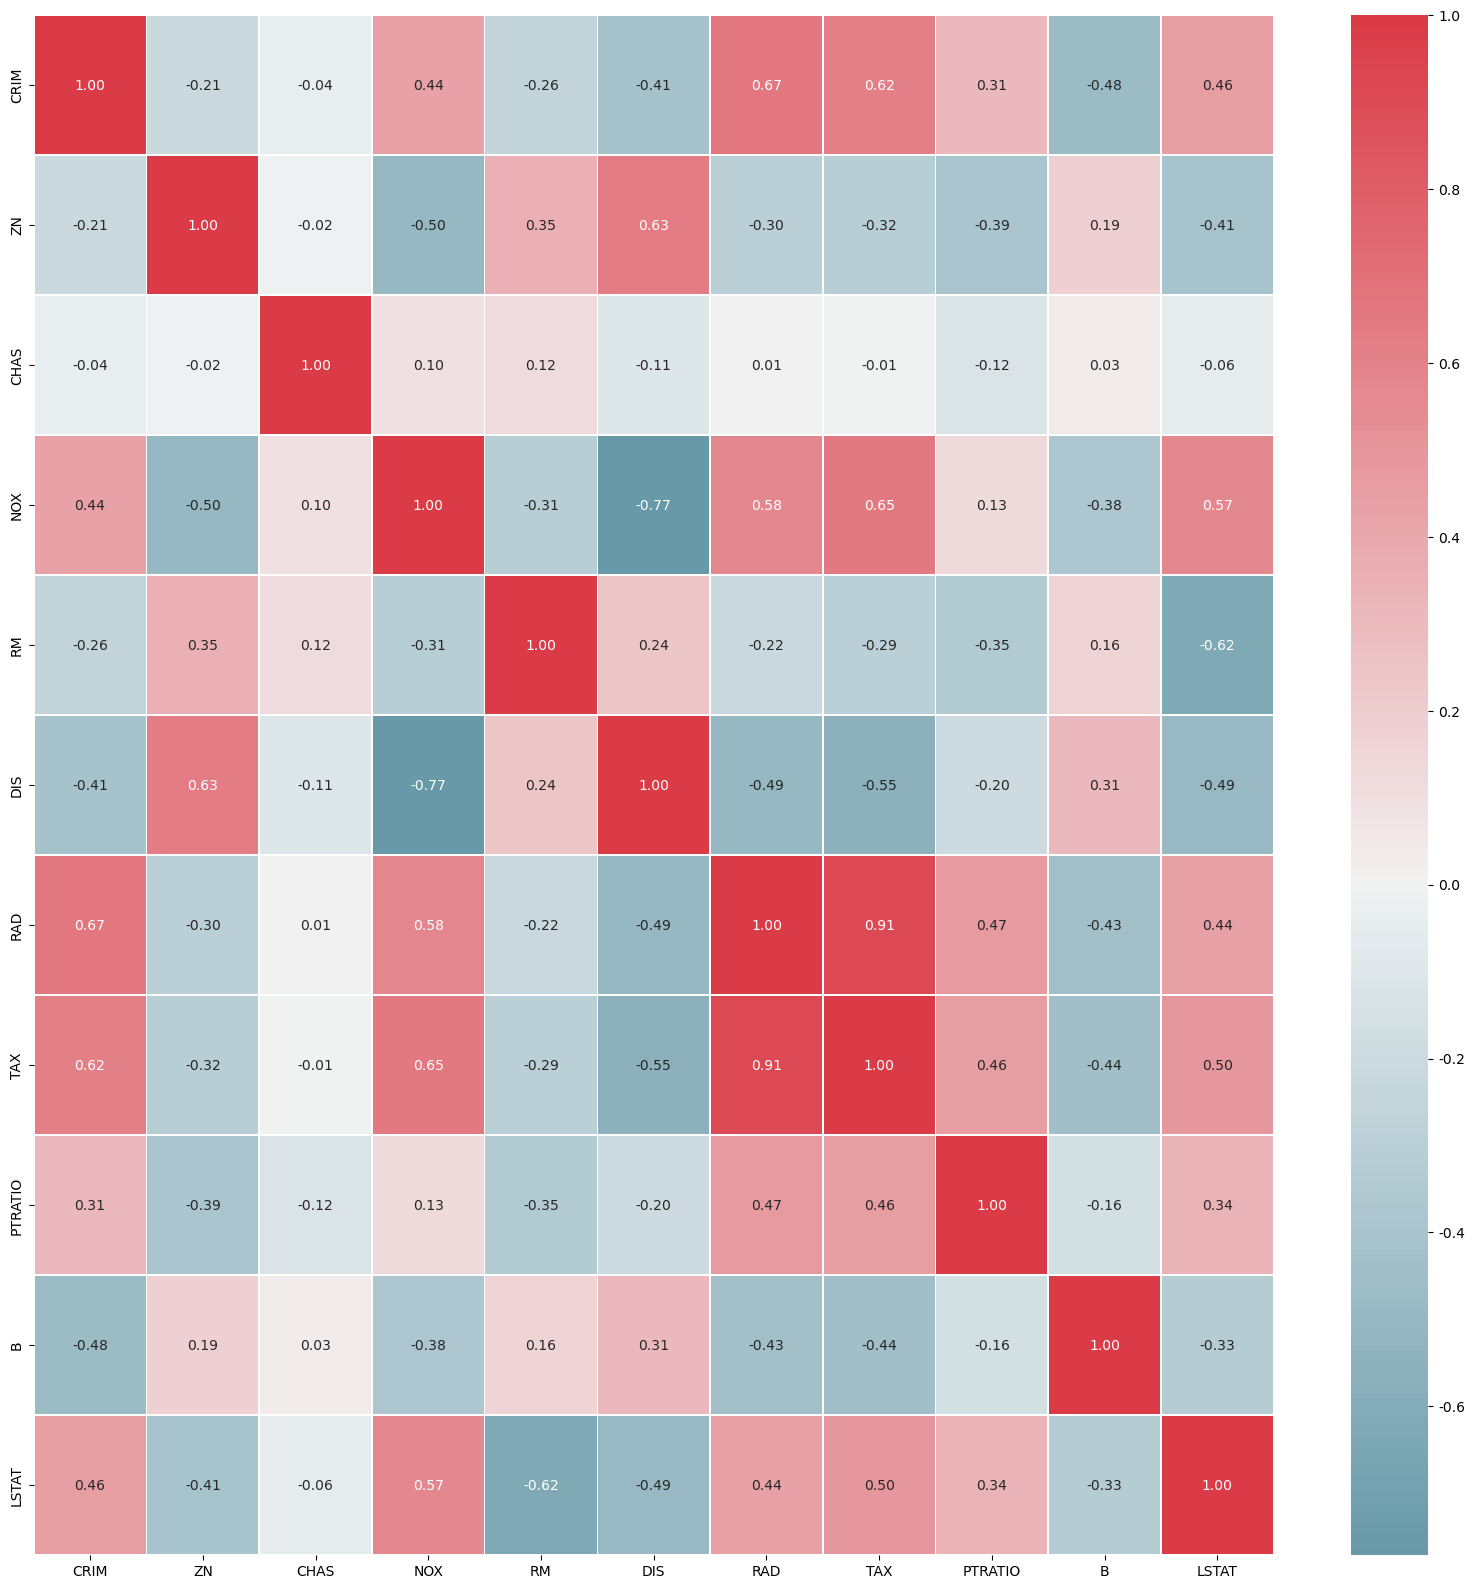

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy as sp  
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data = X_train_scaled.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0)

In [51]:
X_train_scaled.drop(['TAX'], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(X_train_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     88.05
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           1.97e-88
Time:                        16:48:56   Log-Likelihood:                -1072.9
No. Observations:                 354   AIC:                             2168.
Df Residuals:                     343   BIC:                             2210.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.9099      0.271     84.657      0.000      22.378      23.442
CRIM          -0.8195      0.394     -2.082      0.038      -1.594      -0.045
ZN             1.2519      0.391      3.200      0.002       0.482       2.021
CHAS           0.7991      0.278      2.875      0.004       0.252       1.346
NOX           -2.5871      0.514     -5.038      0.000      -3.597      -1.577
RM             2.5777      0.364      7.089      0.000       1.862       3.293
DIS           -3.5110      0.490     -7.164      0.000      -4.475      -2.547
RAD            1.3119      0.460      2.854      0.005       0.408       2.216
PTRATIO       -2.1793      0.365     -5.974      0.000      -2.897      -1.462
B              0.9878      0.319      3.099      0.002       0.361       1.615
LSTAT         -4.0856      0.422     -9.690      0.000      -4.915      -3.256
==============================================================================
Omnibus:                      103.831   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.547
Skew:                           1.318   Prob(JB):                     5.53e-71
Kurtosis:                       6.871   Cond. No.                         5.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
X_test_scaled.drop(['TAX'], axis=1, inplace=True)


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_preds = lr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))

print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_,4))

MSE : 17.470, RMSE : 4.180
Variance score : 0.755
절편 값: [22.90988701]
회귀 계수값: [[-0.8195  1.2519  0.7991 -2.5871  2.5777 -3.511   1.3119 -2.1793  0.9878
  -4.0856]]
